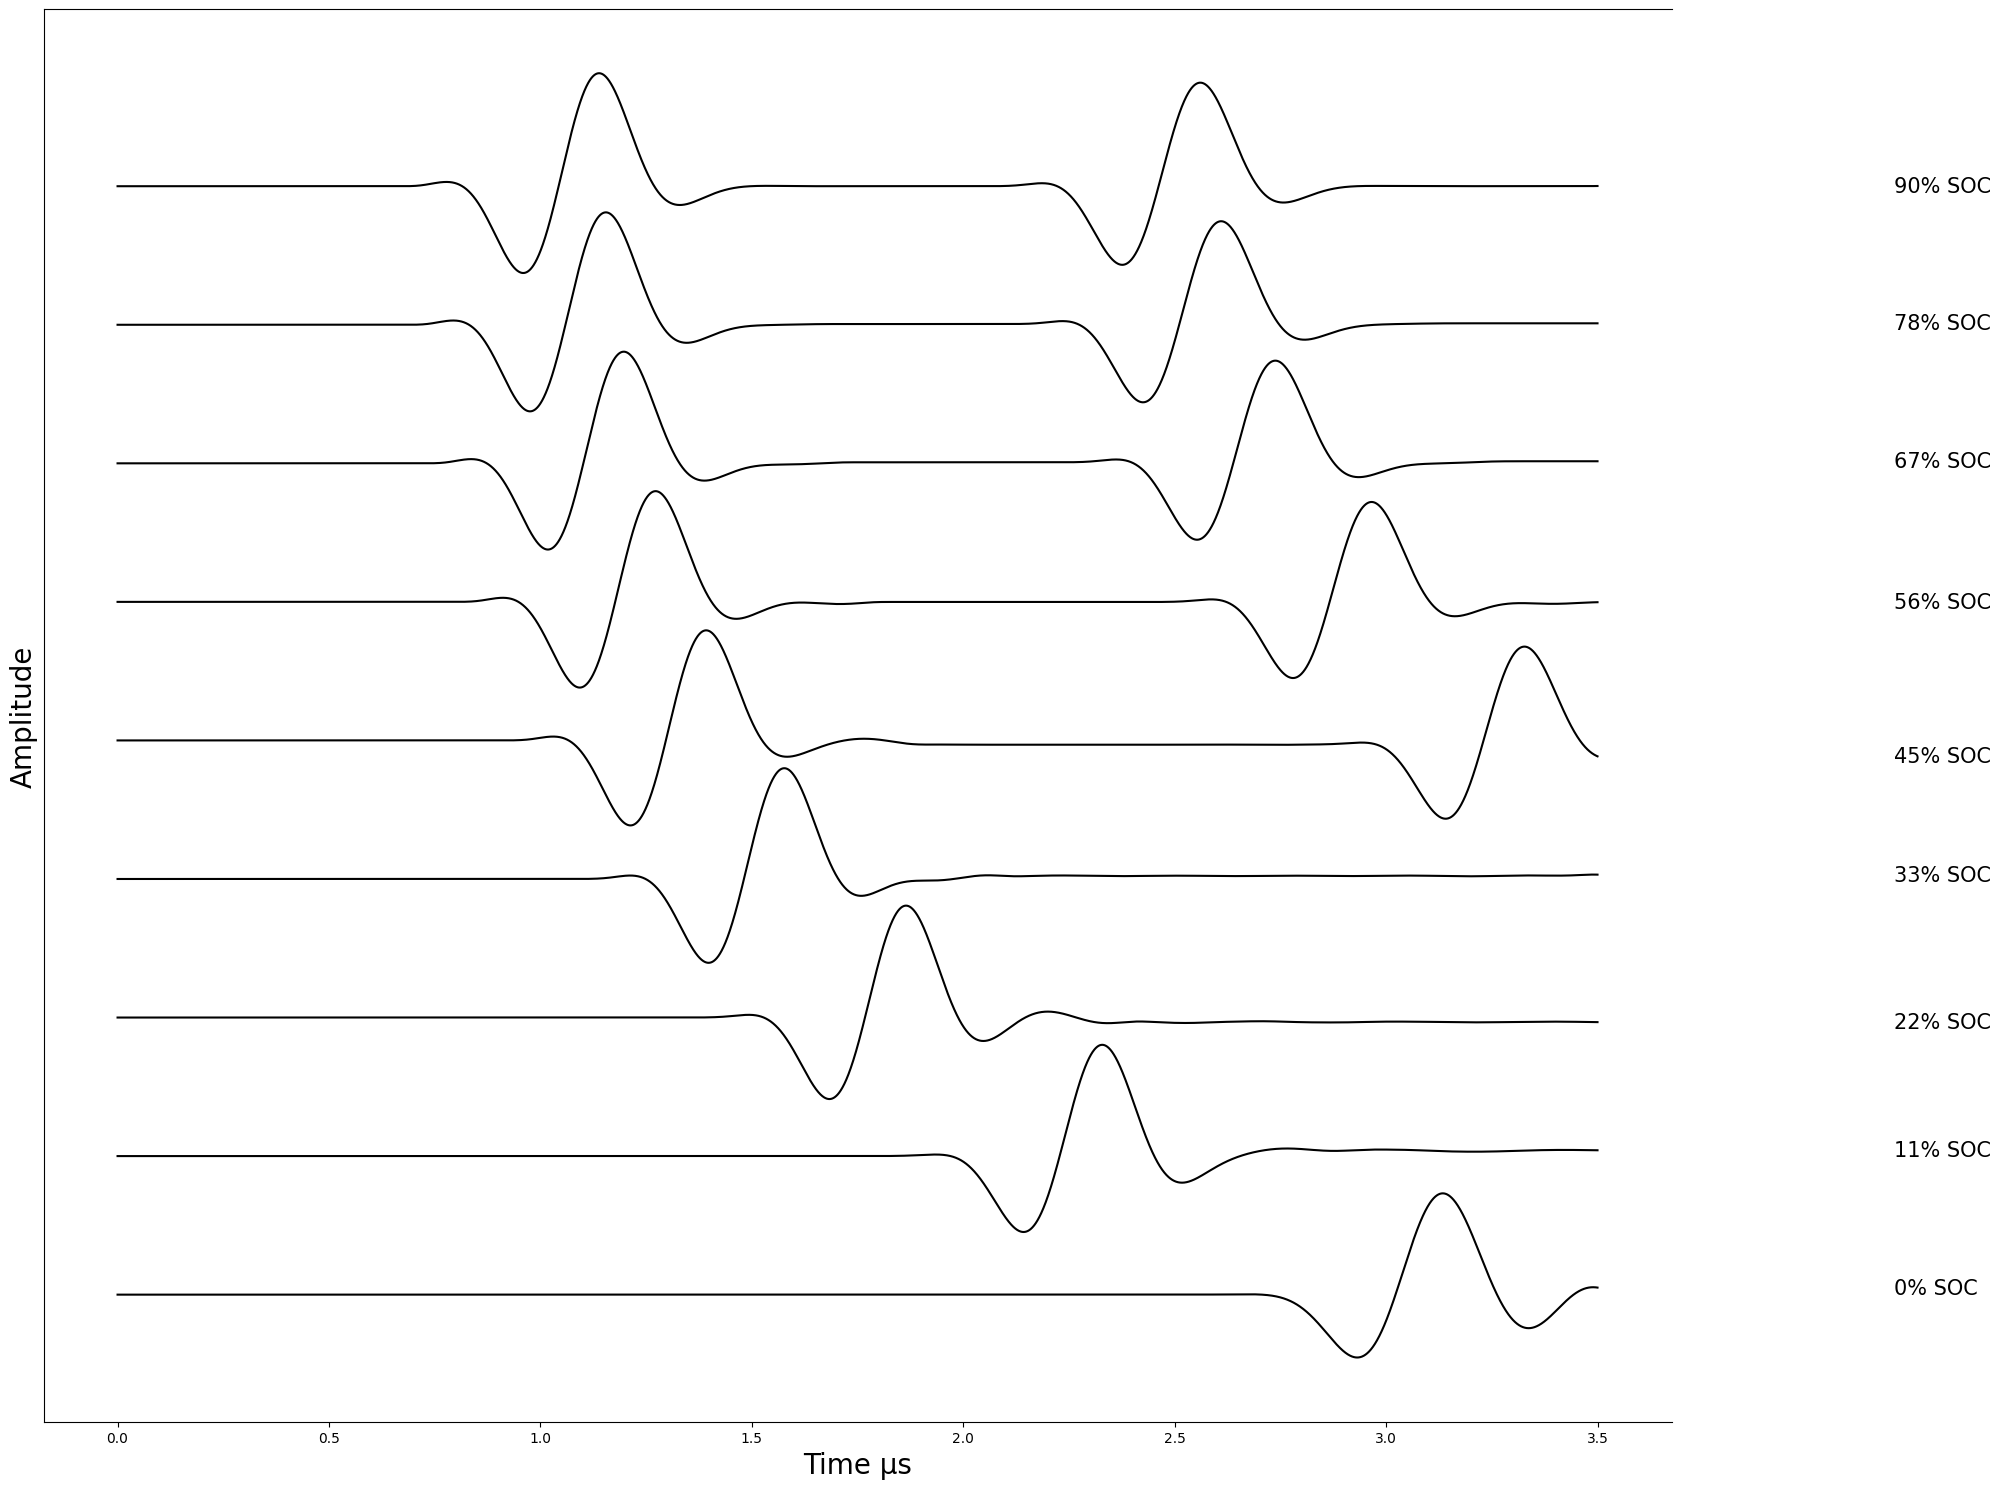

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_npy_files(directory):
    # Get all .npy files in the directory
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort()  # Sort files alphabetically (optional)
    
    num_files = len(npy_files)
    num_subplots = min(num_files, 11)  # Maximum 11 plots
    
    if num_files == 0:
        print("No .npy files found in the directory.")
        return
    
    fig, ax = plt.subplots(figsize=(20, 15))  # Adjusted for a tall layout
    
    soc_labels = np.linspace(0, 90, num_subplots)  # Generate SOC labels from 0% to 100%
    offset = 1.5  # Vertical offset between lines
    
    for i, file in enumerate(npy_files[:11]):
        file_path = os.path.join(directory, file)
        data = np.load(file_path)
        
        if data.ndim < 2:
            print(f"Skipping {file}: Not a 2D array.")
            continue
        
        last_column = data[-1,:]  # Extract last column
        x_values = np.arange(len(last_column)) * 5e-4  # Adjust x-axis scale
        
        ax.plot(x_values, last_column + i * offset, color='black')  # Offset each line
        
        # Add text label to the right side
        ax.text(x_values[-1] + 0.2 * (x_values[-1] - x_values[0]), 
                last_column[-1] + i * offset, 
                f"{int(soc_labels[i])}% SOC", 
                verticalalignment='center', fontsize=15)
    
    ax.set_xlabel(("Time "u"\u03bcs"), fontsize=20)
    ax.set_ylabel("Amplitude", fontsize=20)
    ax.set_yticks([])  # Remove y-ticks
    ax.spines['left'].set_visible(True)  # Hide left spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    
    plt.tight_layout()
    plt.show()

    # Example usage
plot_npy_files("./")

3.134
2.3285
1.8645
1.577
1.3920000000000001
1.2725
1.197
1.155
1.1385


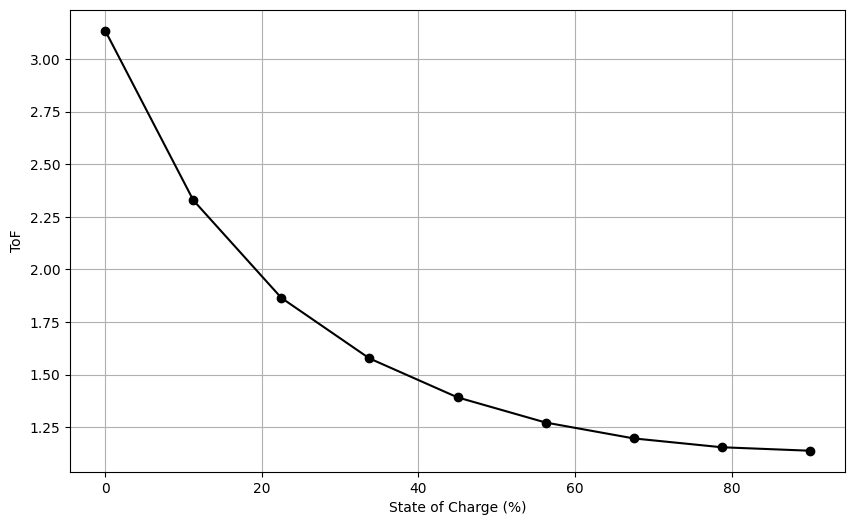

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_max_time_from_npy_files(directory):
    # Obtener todos los archivos .npy en el directorio
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]
    npy_files.sort()  # Ordenar archivos alfabéticamente
    
    num_files = len(npy_files)
    if num_files == 0:
        print("No .npy files found in the directory.")
        return

    # Inicializar lista para almacenar los tiempos de máximos
    max_times = []

    for file in npy_files:
        file_path = os.path.join(directory, file)
        data = np.load(file_path)
        
        if data.ndim < 2:
            print(f"Skipping {file}: Not a 2D array.")
            continue
        
        # Extraer la última columna
        last_column = data[-1,:]
        
        # Encontrar el índice del valor máximo
        max_index = np.argmax(last_column)* 5e-4
        print(max_index)
        
        # Suponiendo que cada fila representa un intervalo de tiempo regular,
        # el índice del máximo es el tiempo (debes ajustar según tu escala de tiempo real)
        max_times.append(max_index)
    
    # Generar etiquetas de SOC del 0% al 100%
    soc_labels = np.linspace(0, 90, num_files)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(soc_labels, max_times, marker='o', linestyle='-', color='black')
    plt.xlabel('State of Charge (%)')
    plt.ylabel('ToF')
    plt.grid(True)
    plt.show()

# Llamar a la función con el directorio deseado
plot_max_time_from_npy_files('./')


In [9]:
data = np.load('nodes_f1100_dt_f0.0005_layer_n_256_0.npy')

# Extraer la última columna
last_column = data[-1,:]  # Extract last column

# Encontrar el índice del valor máximo
max_index = np.max(last_column)
print(max_index)

1.096774462548597
